In [54]:
import pandas as pd
from create_data_loader import split_by_artist_given, split_by_strata_artist
import torch
dataset_name = "fashion"
if dataset_name == 'wikiart':
    df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_no_artist_filtered.pkl')
elif dataset_name == 'fashion':
    df = pd.read_pickle('DATA/Dataset/iDesigner/idesigner_influences_cropped_features.pkl')

feature_extractor = "ResNet34_newsplit"
artist_split = False

if artist_split:
    artist_name = "paul-gauguin"
    feature_extractor = "Artists"
    df_new = split_by_artist_given(df, artist_name)
    IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/{artist_name}_TripletResNet_image_features_posrandom_negrandom_10_margin2/IR_metrics/metrics_val.pth')
    baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{artist_name}_image_features.pth")
else:
    df_new = split_by_strata_artist(df)
    IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_image_features_posrandom_negrandom_10_margin2/IR_metrics/metrics_val.pth')
    baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/image_features.pth")

indeces = list(df_new[df_new['mode'] == 'val'].index)

In [7]:
import pandas as pd
df = pd.read_pickle('DATA/Dataset/iDesigner/idesigner_influences.pkl')

In [8]:
df.influenced_by = df.influenced_by.apply(lambda x: ', '.join(x))
df

,relative_path,artist_name,influenced_by
0,giambattista valli/SS08DLR_Valli_009.png,giambattista valli,"valentino, chanel"
1,giambattista valli/SS17DLR_Valli_020.png,giambattista valli,"valentino, chanel"
2,giambattista valli/SS17DLR_Valli_008.png,giambattista valli,"valentino, chanel"
3,giambattista valli/SS18DLR_Valli_027.png,giambattista valli,"valentino, chanel"
4,giambattista valli/SS08DLR_Valli_021.png,giambattista valli,"valentino, chanel"
...,...,...,...
48474,gucci/SS17DLA_Gucci_007.png,gucci,gucci
48475,gucci/SS18DLR_Gucci_008.png,gucci,gucci
48476,gucci/SS17DLA_Gucci_013.png,gucci,gucci
48477,gucci/SS18DLR_Gucci_020.png,gucci,gucci


In [55]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query, positive_indexes, df):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ 'influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(1, 10, figsize=(20, 10))
    for i, ax in enumerate(axes):
        #ax.imshow(Image.open('wikiart/'+df.iloc[query].relative_path))
        image_path = general_image_path+df.iloc[positive_indexes[i]].relative_path
        image =  Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(df.iloc[positive_indexes[i]].artist_name)
    plt.show()

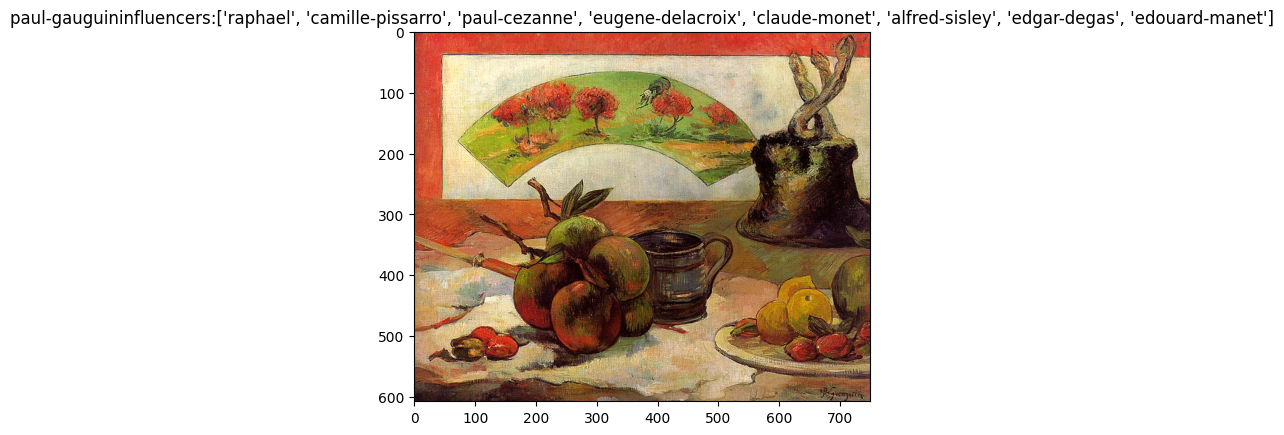

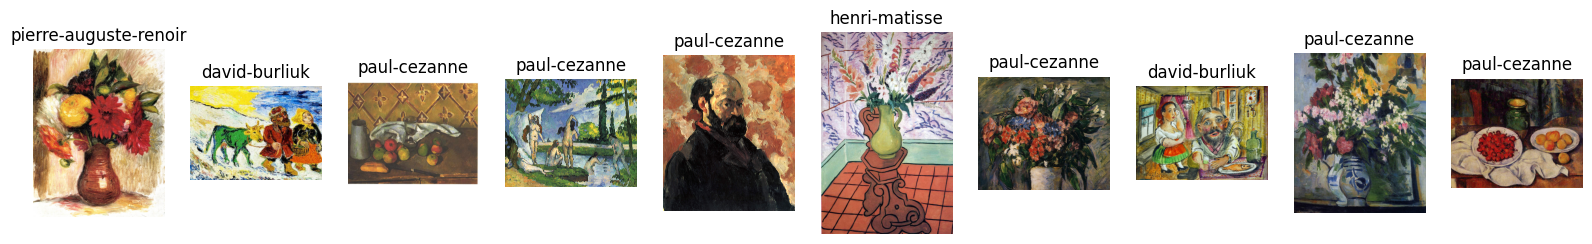

In [56]:

plot_examples(indeces[5],IR_metrics['retrieved_indexes'][indeces[5]], df_new)

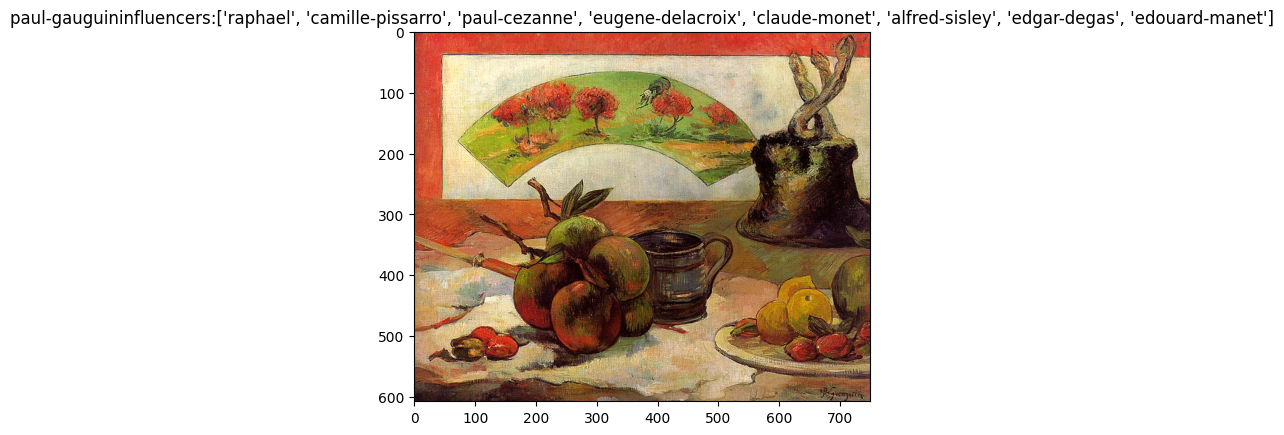

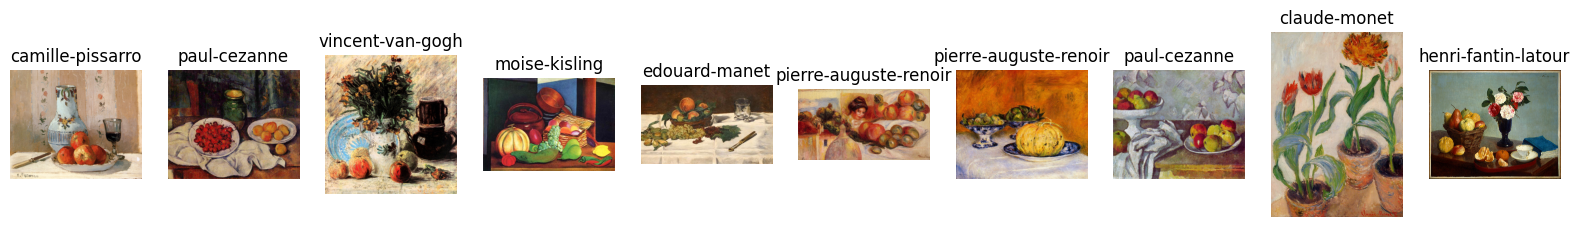

In [57]:

plot_examples(indeces[5],baseline_IR['retrieved_indexes'][indeces[5]], df_new)